<a href="https://colab.research.google.com/github/Tharungowdapr/aiml-basics/blob/main/Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Trees and Random Forests**

---


In [1]:
!pip install graphviz
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 10.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [8]:
df = pd.read_csv(f"{path}/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
X = df.drop("target", axis=1)  # all features
y = df["target"]               # label


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



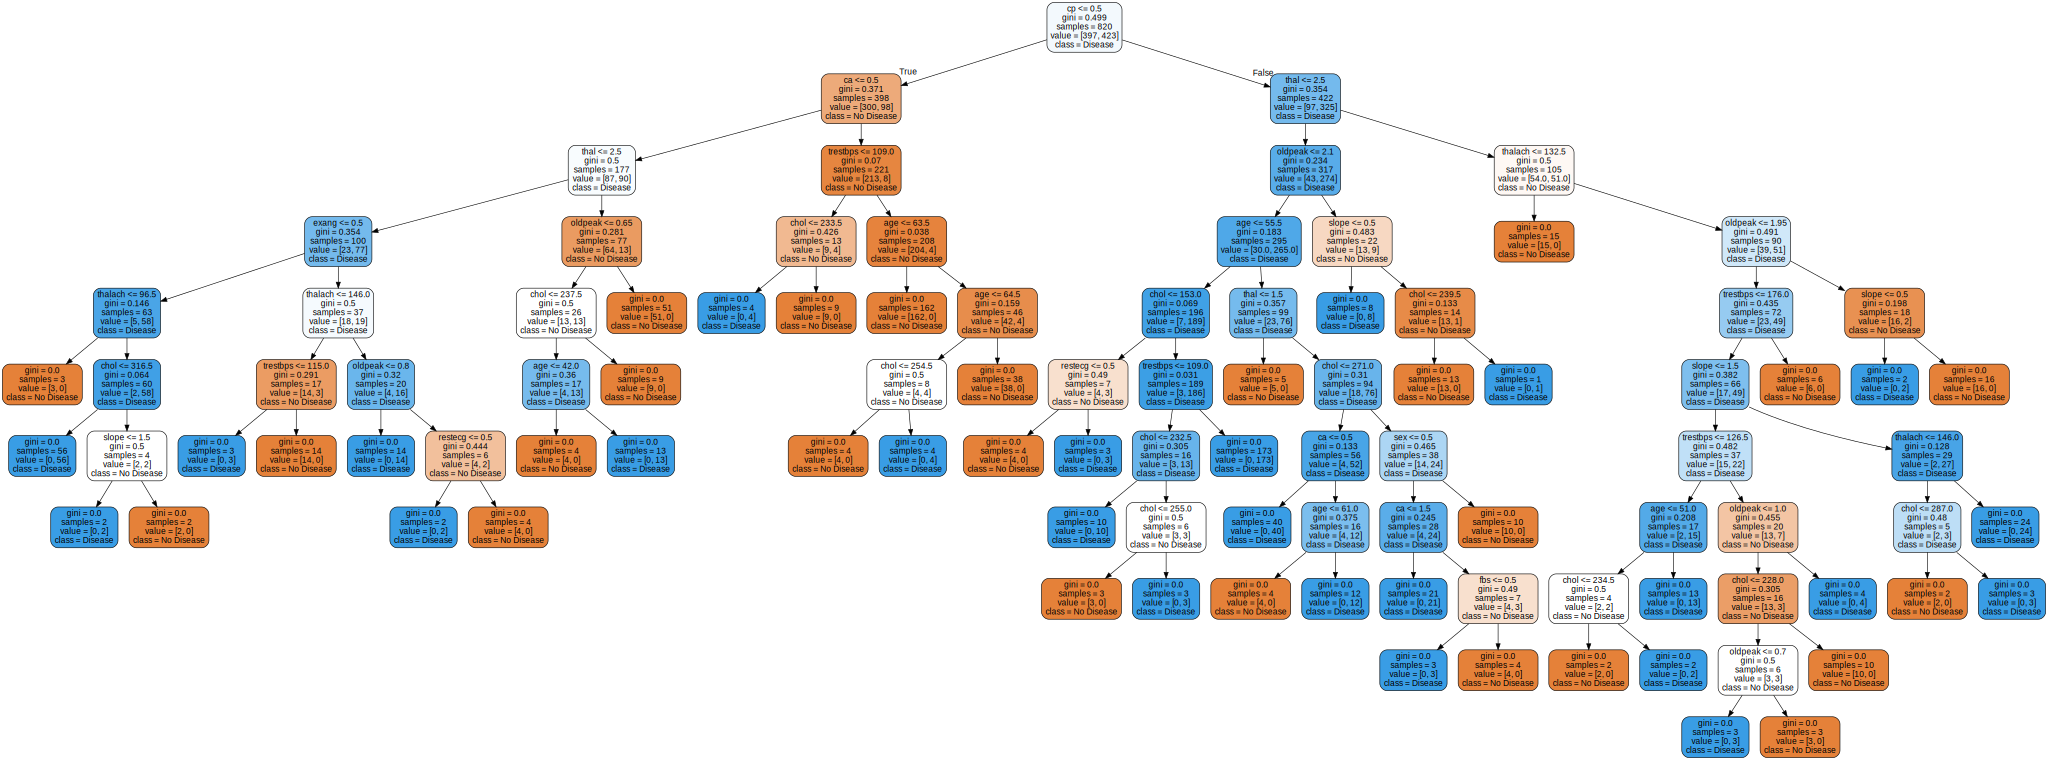

In [13]:
dot_data = export_graphviz(
    dt, out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True, rounded=True
)

graph = graphviz.Source(dot_data)
graph


In [14]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.8


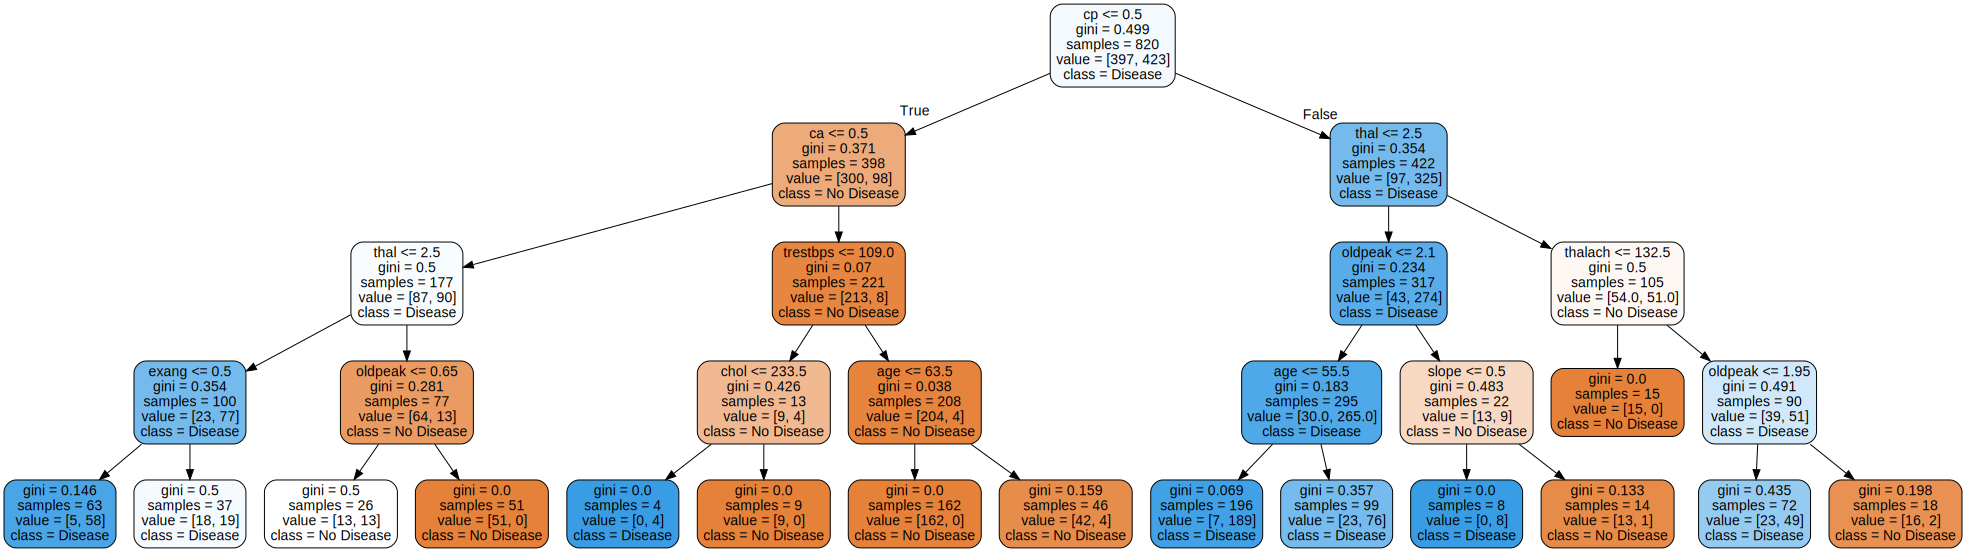

In [25]:
dot_data = export_graphviz(
    dt_pruned, out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True, rounded=True
)

graph = graphviz.Source(dot_data)
graph


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [16]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



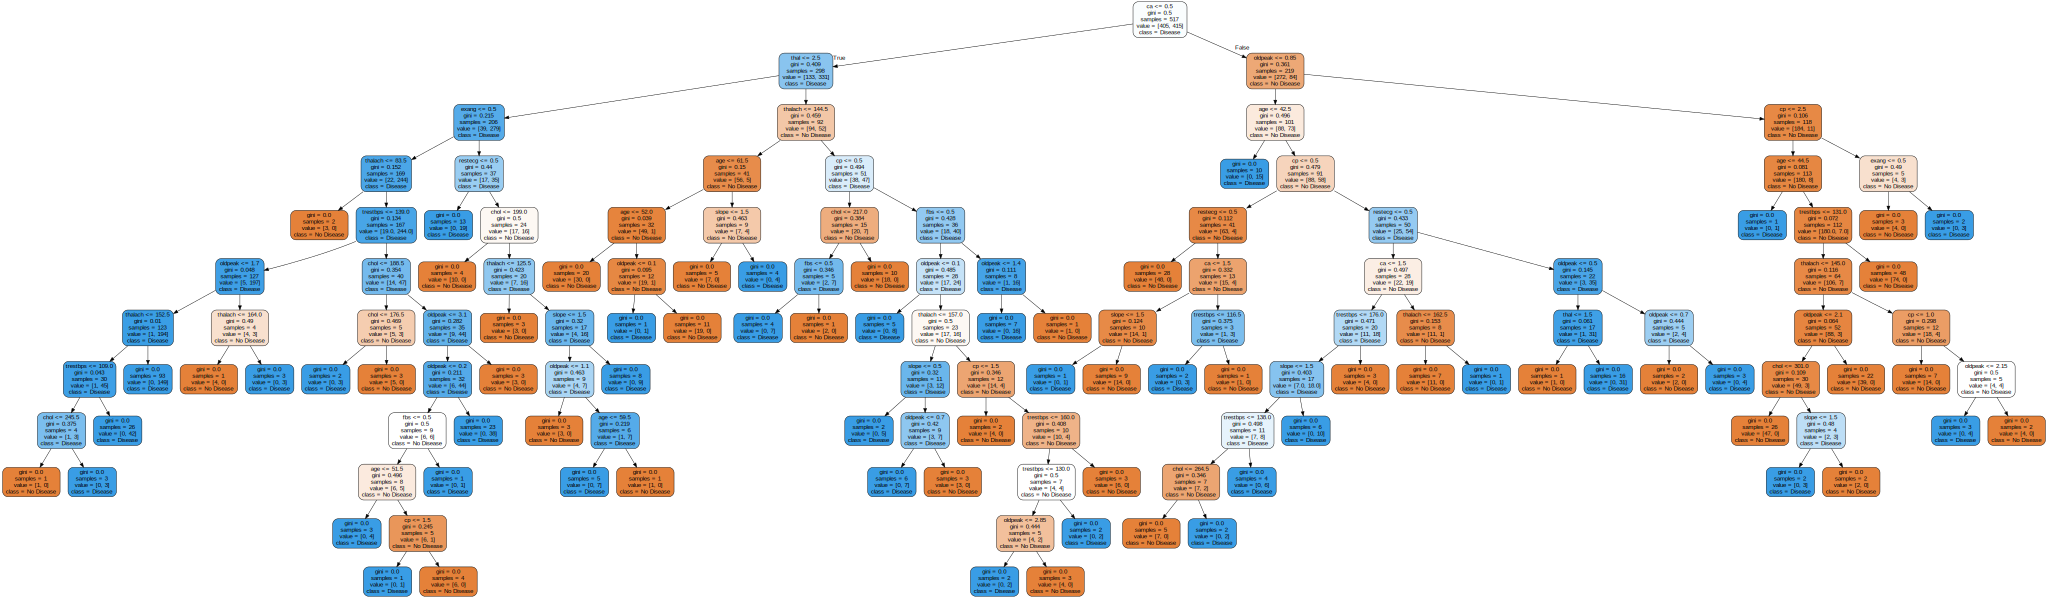

In [23]:
# Extract one of the decision trees from the Random Forest
one_tree = rf.estimators_[0]

dot_data_rf_tree = export_graphviz(
    one_tree, out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True, rounded=True
)

graph_rf_tree = graphviz.Source(dot_data_rf_tree)
graph_rf_tree

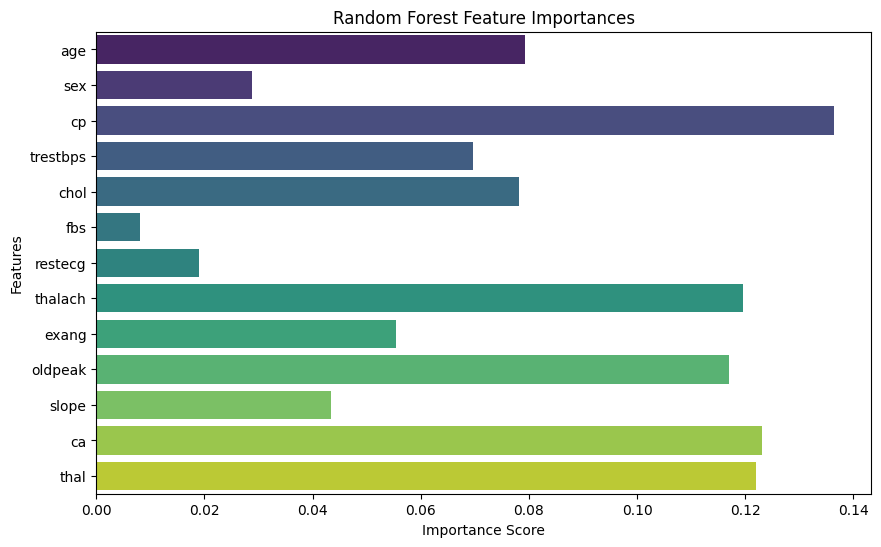

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='viridis', legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [18]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


,0
cp,0.136494
ca,0.123180
thal,0.122048
thalach,0.119684
oldpeak,0.117045
age,0.079199
chol,0.078098
trestbps,0.069589
exang,0.055335
slope,0.043412


In [19]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
